## Tarea 6 Aprendizaje supervisado

In [ ]:
#Partimos de nuestros datos originales limpios y sin variables dummy

datos = pd.read_csv('C:/Users/diego/OneDrive/Documentos/Vscode Projects/Aprendizaje Automatico/base limpia.csv')


In [ ]:
#creamos dummys de las variables categoricas

columnas_objeto = datos.select_dtypes(include=['object']).columns
datos= dummy_creation(datos, columnas_objeto)

#eliminamos las columnas objeto
datos = datos.drop(columns = columnas_objeto)

In [ ]:
#Separamos los datos en train y test

# Suponiendo que 'df' es tu DataFrame y 'int_rate' es la columna que quieres predecir
X = datos.drop('int_rate', axis=1)
y = datos['int_rate']

# Separa los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
#Estandarizamos los datos con un min max scaler

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_est = minmax_scaler.transform(X_train)
X_test_est = minmax_scaler.transform(X_test)


In [ ]:
from joblib import Parallel, delayed
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LassoLars, OrthogonalMatchingPursuit, HuberRegressor, BayesianRidge, PassiveAggressiveRegressor, Lars
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import time
import pandas as pd

modelos = {
    'RandomForest': RandomForestRegressor(n_jobs=-1),
    'ExtraTrees': ExtraTreesRegressor(n_jobs=-1),
    'Ridge': Ridge(),
    'GradientBoosting': GradientBoostingRegressor(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'LassoLars': LassoLars(),
    'DecisionTree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'OrthogonalMatchingPursuit': OrthogonalMatchingPursuit(),
    'KNN': KNeighborsRegressor(),
    'Dummy': DummyRegressor(),
    'Huber': HuberRegressor(),
    'BayesianRidge': BayesianRidge(),
    'PassiveAggressive': PassiveAggressiveRegressor(),
    'Lars': Lars(),
    'XGBoost': xgb.XGBRegressor(n_jobs=-1),
    'LightGBM': lgb.LGBMRegressor(n_jobs=-1)
}



def entrenar_evaluar_modelo(nombre, modelo, X_train_est, y_train, X_test_est, y_test, num_evaluaciones=1):
    mse_lista = []
    mae_lista = []
    r2_lista = []
    tiempo_lista = []
    
    for _ in range(num_evaluaciones):
        start_time = time.time()
        
        modelo.fit(X_train_est, y_train)
        y_pred = modelo.predict(X_test_est)
        
        end_time = time.time()
        
        mse_lista.append(mean_squared_error(y_test, y_pred))
        mae_lista.append(mean_absolute_error(y_test, y_pred))
        r2_lista.append(r2_score(y_test, y_pred))
        tiempo_lista.append(end_time - start_time)
    
    return {
        'Modelo': nombre,
        'MSE Promedio': sum(mse_lista) / num_evaluaciones,
        'MAE Promedio': sum(mae_lista) / num_evaluaciones,
        'R2 Promedio': sum(r2_lista) / num_evaluaciones,
        'Tiempo Ejecucion': sum(tiempo_lista) / num_evaluaciones,
    }

# Paralelizar el ciclo principal con, por ejemplo, 30 evaluaciones
num_evaluaciones = 3
resultados = Parallel(n_jobs=-1)(delayed(entrenar_evaluar_modelo)(nombre, modelo, X_train_est, y_train, X_test_est, y_test, num_evaluaciones) for nombre, modelo in modelos.items())

df_resultados = pd.DataFrame(resultados)
print(df_resultados)    


                       Modelo  MSE Promedio  MAE Promedio  R2 Promedio  \
0                RandomForest      4.424618      1.473091     0.787728   
1                  ExtraTrees      5.506212      1.759329     0.735838   
2                       Ridge      5.804918      1.871778     0.721507   
3            GradientBoosting      6.330246      1.950328     0.696305   
4                  ElasticNet     19.804635      3.605117     0.049867   
5                       Lasso     20.844307      3.699133    -0.000012   
6                   LassoLars     20.844307      3.699133    -0.000012   
7                DecisionTree      9.841204      2.116008     0.527865   
8                    AdaBoost     12.480605      2.947716     0.401239   
9   OrthogonalMatchingPursuit     12.517209      2.823602     0.399483   
10                        KNN      9.266631      2.359409     0.555431   
11                      Dummy     20.844307      3.699133    -0.000012   
12                      Huber      5.8

In [ ]:
from tabulate import tabulate

# Imprime el DataFrame con un formato de tabla usando tabulate
print(tabulate( df_resultados.sort_values(by='R2 Promedio', ascending=False), headers='keys', tablefmt='psql', showindex=False))


+---------------------------+----------------+----------------+----------------+
| Modelo                    |   MSE Promedio |   MAE Promedio |    R2 Promedio |
|---------------------------+----------------+----------------+----------------|
| XGBoost                   |        1.36523 |       0.874477 |    0.934503    |
| LightGBM                  |        2.98317 |       1.3109   |    0.856882    |
| RandomForest              |        4.42462 |       1.47309  |    0.787728    |
| ExtraTrees                |        5.50621 |       1.75933  |    0.735838    |
| BayesianRidge             |        5.8048  |       1.87129  |    0.721513    |
| Ridge                     |        5.80492 |       1.87178  |    0.721507    |
| Huber                     |        5.84488 |       1.85614  |    0.71959     |
| GradientBoosting          |        6.33025 |       1.95033  |    0.696305    |
| KNN                       |        9.26663 |       2.35941  |    0.555431    |
| DecisionTree              

In [ ]:
df_resultados.sort_values(by='R2 Promedio', ascending=False).to_clipboard(index=False)



In [ ]:
#Convertimos a df x_train y x_test

X_train_est = pd.DataFrame(X_train_est, columns=X_train.columns)
X_test_est = pd.DataFrame(X_test_est, columns=X_test.columns)


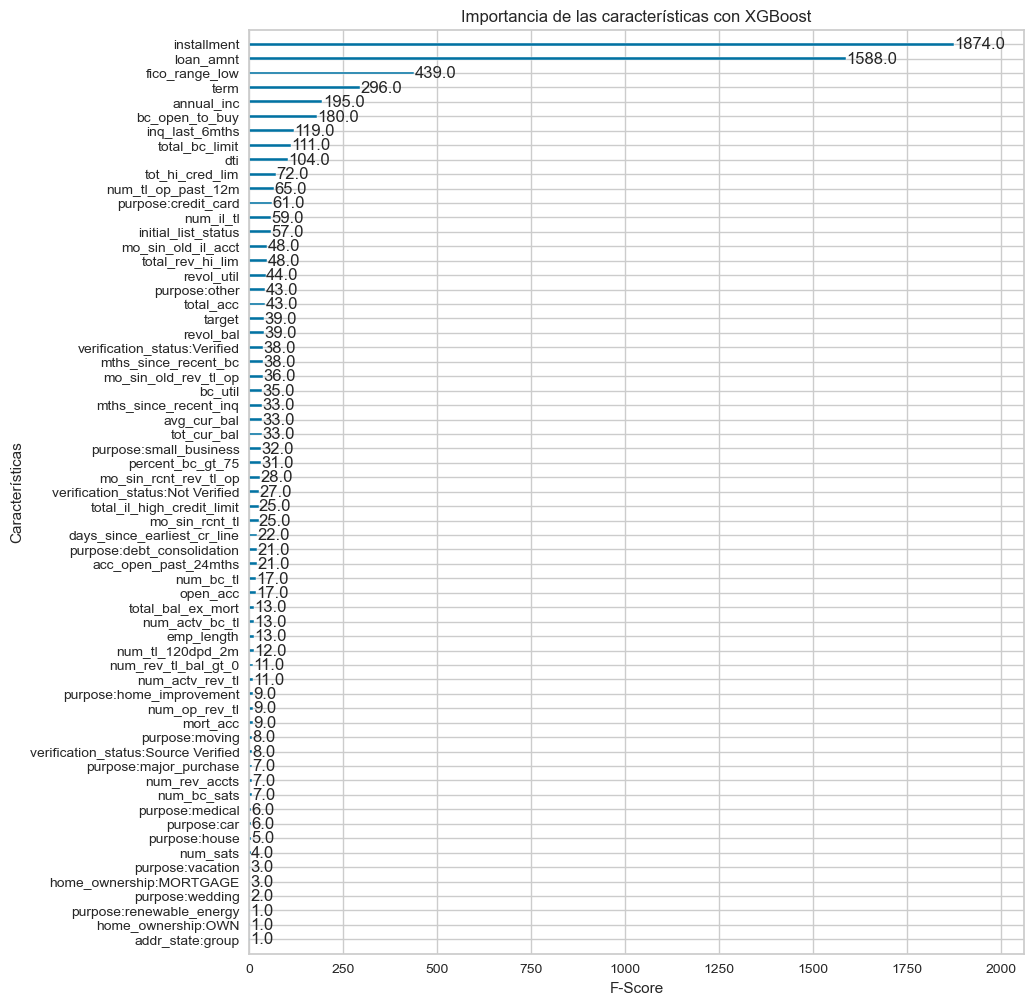

In [ ]:
# Entrenar un modelo XGBoost para obtener la importancia de las características


model = xgb.XGBRegressor(n_jobs=-1)
model.fit(X_train_est, y_train)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Ordenar las características según su importancia
sorted_idx = feature_importance.argsort()

# Visualizar la importancia de las características
plt.figure(figsize=(10, 12))
plot_importance(model, importance_type='weight', title='Importancia de las características con XGBoost', xlabel='F-Score', ylabel='Características', ax=plt.gca())
plt.show()

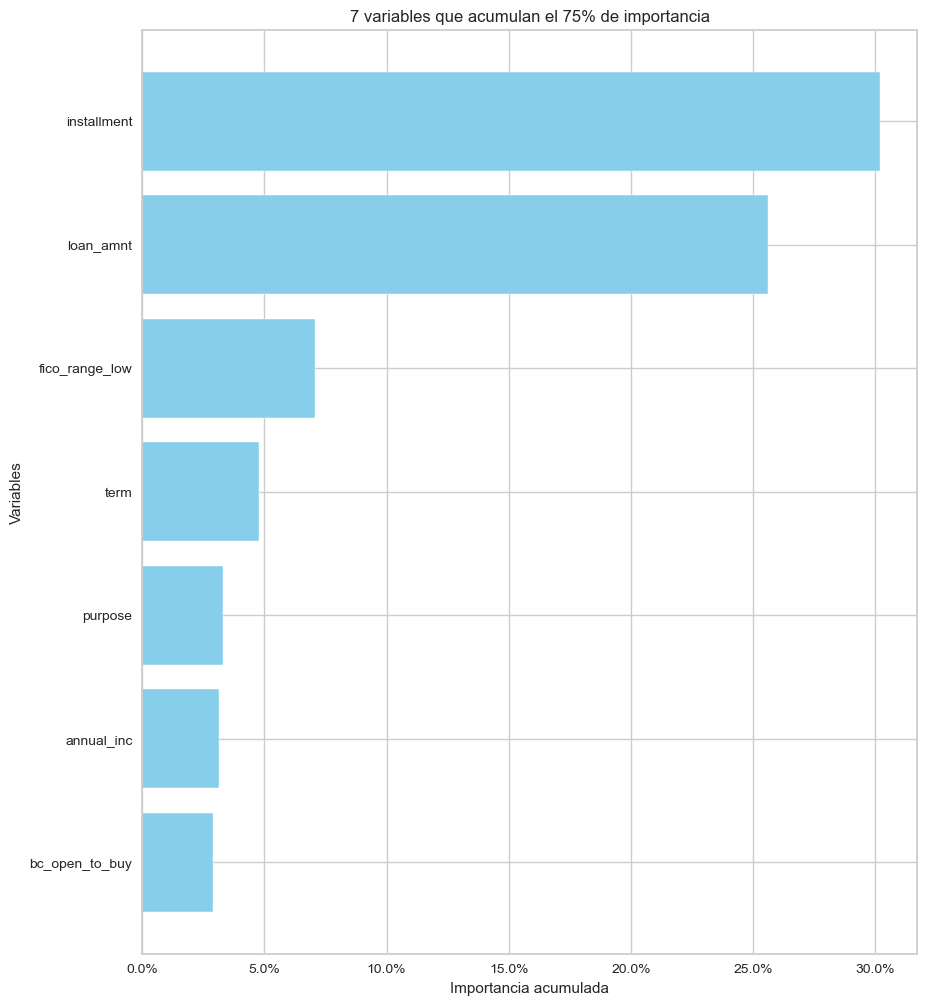

In [ ]:


# Obtener la importancia de las características del modelo usando "gain" o 'weight'
feature_importance = model.get_booster().get_score(importance_type='weight')


# Como el método anterior proporciona importancia solo para características usadas en el árbol,
# llenaremos la importancia de las características no usadas con 0.
for column in X_train_norm.columns:
    if column not in feature_importance:
        feature_importance[column] = 0

# Agrupar las importancias por variable original
importance_dict = {}
for feature, importance in feature_importance.items():
    main_feature = feature.split(':')[0]
    importance_dict[main_feature] = importance_dict.get(main_feature, 0) + importance

# Ordenar las variables por su importancia acumulada
sorted_features = sorted(importance_dict, key=importance_dict.get, reverse=True)
sorted_importances = [importance_dict[feature] for feature in sorted_features]

# Determinar cuántas variables necesitas para alcanzar el X% de la importancia acumulada
cumulative_importance_grouped = np.cumsum(sorted_importances)
total_importance = cumulative_importance_grouped[-1]
threshold_percent = 0.75 * total_importance
num_features_percent = np.where(cumulative_importance_grouped >= threshold_percent)[0][0] + 1

# Seleccionar esas variables
selected_features_grouped = sorted_features[:num_features_percent]


#filtro para las caracterticas

filtered_columns = [col for col in X_train_norm.columns if col.split(':')[0] in selected_features_grouped]



# Graficar las variables seleccionadas
fig, ax = plt.subplots(figsize=(10, 12))
ax.barh(selected_features_grouped, np.array(sorted_importances[:num_features_percent]) / total_importance, color='skyblue')
ax.set_xlabel('Importancia acumulada')
ax.xaxis.set_major_formatter(PercentFormatter(1))
ax.set_ylabel('Variables')
ax.set_title(f'{num_features_percent} variables que acumulan el 75% de importancia')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#dejamos solo las variables a utlizar

X_train_est = X_train_est[filtered_columns]

In [ ]:
#creamos un modelo generico
reg = xgb.XGBRegressor( booster='gbtree', objective='reg:squarederror')

In [ ]:
# Importing core libraries
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
from functools import partial

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

# Classifier/Regressor
from xgboost import XGBRegressor, DMatrix

# Model selection
from sklearn.model_selection import KFold, StratifiedKFold

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer

# Data processing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title="model", callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    
    if callbacks is not None:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
        
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           + u"\u00B1"+" %.3f") % (time() - start, 
                                   len(optimizer.cv_results_['params']),
                                   best_score,
                                   best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [ ]:
# Setting the scoring function
scoring = make_scorer(partial(mean_squared_error, squared=False), 
                      greater_is_better=False)

In [ ]:
y_stratified = pd.cut(y_train.rank(method='first'), bins=10, labels=False)

# Setting the validation strategy
skf = StratifiedKFold(n_splits=7,
                      shuffle=True, 
                      random_state=0)

cv_strategy = list(skf.split(X_train_est, y_stratified))

In [ ]:
# Setting the search space
search_spaces = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': Integer(2, 12),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': Real(1e-9, 100., 'uniform'), # L2 regularization
                 'reg_alpha': Real(1e-9, 100., 'uniform'), # L1 regularization
                 'n_estimators': Integer(50, 5000)
   }

In [ ]:
# Wrapping everything up into the Bayesian optimizer
opt = BayesSearchCV(estimator=reg,                                    
                    search_spaces=search_spaces,                      
                    scoring=scoring,                                  
                    cv=cv_strategy,                                           
                    n_iter=120,                                       # max number of trials
                    n_points=1,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=1,                                         # number of jobs
                    iid=False,                                        # if not iid it optimizes on the cv score
                    return_train_score=False,                         
                    refit=False,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                    random_state=0)                                   # random state for replicability

In [ ]:
# Running the optimizer
overdone_control = DeltaYStopper(delta=0.0001)                    # We stop if the gain of the optimization becomes too small
time_limit_control = DeadlineStopper(total_time=60*60*4)          # We impose a time limit (7 hours)

best_params = report_perf(opt, X_train, y_train,'XGBoost_regression', 
                          callbacks=[overdone_control, time_limit_control])

XGBoost_regression took 9404.49 seconds,  candidates checked: 3, best CV score: -1.106 ± 0.015
Best parameters:
OrderedDict([('colsample_bytree', 0.5758225678679059),
             ('learning_rate', 0.06731886525659495),
             ('max_depth', 5),
             ('n_estimators', 998),
             ('reg_alpha', 24.04631523135751),
             ('reg_lambda', 34.21270253201294),
             ('subsample', 0.6778671495585501)])



In [ ]:
#evaluamos el modelo con los parametros optimos
from sklearn.model_selection import cross_val_score

# Asumiendo que best_params contiene los mejores hiperparámetros para XGBRegressor
reg = xgb.XGBRegressor(**best_params)

# Calculando R^2 con cross-validation
r2_scores = cross_val_score(reg, X_train_est, y_train, cv=5, scoring='r2')

# El valor promedio de R^2 de la validación cruzada
r2_mean = r2_scores.mean()

# Imprimir el R^2 promedio
print(f'R^2 promedio de la validación cruzada: {r2_mean}')


R^2 promedio de la validación cruzada: 0.9334913878649285


In [ ]:
#dejamos solo las variables a utlizar en el test

X_test_est = X_test_est[filtered_columns]

In [ ]:
from sklearn.metrics import r2_score

# Entrenar el modelo con todo el conjunto de entrenamiento
reg.fit(X_train_est, y_train)

# Predecir el conjunto de prueba
y_pred_test = reg.predict(X_test_est)

# Calcular R^2 para el conjunto de prueba
r2_test = r2_score(y_test, y_pred_test)

# Imprimir R^2 para los datos de prueba
print(f'R^2 para los datos de prueba: {r2_test}')


R^2 para los datos de prueba: 0.9360723078592122


In [ ]:
#calcuamos la diferencia entre observados y predichos 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df['Difference'] = df['Actual'] - df['Predicted']

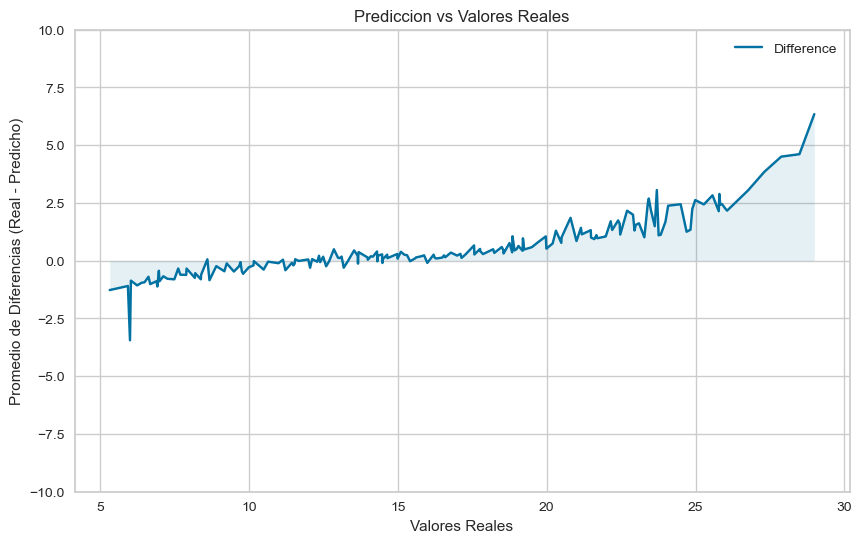

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Crear DataFrame
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Calcular la diferencia
df['Difference'] = df['Actual'] - df['Predicted']

# Agrupar por el valor 'Actual' y calcular el promedio de las 'Differences'
grouped = df.groupby('Actual')['Difference'].mean().reset_index()

# Ordenar los valores por 'Actual' para el trazado de la línea
grouped_sorted = grouped.sort_values('Actual')

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar la línea
plt.plot(grouped_sorted['Actual'], grouped_sorted['Difference'], label='Difference')

# Rellenar el área bajo la curva
plt.fill_between(grouped_sorted['Actual'], grouped_sorted['Difference'], alpha=0.1)

plt.ylim(-10 ,10)
# Etiquetas y título
plt.title('Prediccion vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Promedio de Diferencias (Real - Predicho)')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:

# Crear DataFrame
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Calcular la diferencia
df['Difference'] = df['Actual'] - df['Predicted']

# Definir bins o segmentos
num_bins = 10
bins = np.linspace(df['Actual'].min(), df['Actual'].max(), num_bins)
df['bins'] = pd.cut(df['Actual'], bins=bins)

# Calcular el error promedio y el porcentaje de observaciones por bin
bin_group = df.groupby('bins').agg(
    Error_Promedio=('Difference', 'mean'),
    Observaciones=('Difference', 'count')
)

# Calcular el porcentaje de observaciones respecto al total
bin_group['% Observaciones'] = (bin_group['Observaciones'] / df.shape[0]) * 100

# Calcular las observaciones acumuladas
bin_group['% Observaciones Acumuladas'] = bin_group['Observaciones'].cumsum() / bin_group['Observaciones'].sum() * 100

# Resetear el índice para tener 'bins' como una columna normal
bin_group = bin_group.reset_index()

# Mostrar la tabla
print(bin_group)


             bins  Error_Promedio  Observaciones  % Observaciones  \
0    (5.32, 7.95]       -0.749316           8726        16.704635   
1   (7.95, 10.58]       -0.396554           7404        14.173861   
2  (10.58, 13.21]       -0.003832          11717        22.430461   
3  (13.21, 15.84]        0.134592          10498        20.096866   
4  (15.84, 18.47]        0.253438           6578        12.592607   
5   (18.47, 21.1]        0.651722           3961         7.582748   
6   (21.1, 23.73]        1.538602           1549         2.965331   
7  (23.73, 26.36]        2.341864            920         1.761204   
8  (26.36, 28.99]        3.931297             54         0.103375   

   % Observaciones Acumuladas  
0                   16.974342  
1                   31.377050  
2                   54.169666  
3                   74.591009  
4                   87.386932  
5                   95.092108  
6                   98.105316  
7                   99.894956  
8                  10